# Comprehensive Model Evaluation and Hyperparameter Tuning on Breast Cancer Diagnostic Data

## Introduction

In this notebook, we will conduct a comprehensive evaluation of various machine learning models on the well-known Breast Cancer Diagnostic dataset. Our goal is to determine the best-performing model for classifying malignant and benign tumors using a range of classification algorithms. This includes:

- **Data Loading and Preprocessing**: Loading the dataset and splitting it into training and testing sets.
- **Model Definition**: Defining a variety of classification models from `scikit-learn`.
- **Hyperparameter Tuning**: Utilizing `GridSearchCV` to find the optimal hyperparameters for each model.
- **Model Evaluation**: Evaluating the performance of each model based on accuracy and other relevant metrics.
- **Best Model Identification**: Identifying the best model based on its performance on the test set.

## Introduction of the Dataset
The dataset is available at the UCI Machine Learning Repository and is from the University of Wisconsin Hospitals, Madison. The dataset contains 569 samples of malignant and benign tumor cells. The first two columns in the dataset store the unique ID numbers of the samples and the corresponding diagnosis (M=malignant, B=benign), respectively. The columns 3-32 contain 30 real-value features that have been computed from digitized images of the cell nuclei, which can be used to build a model to predict whether a tumor is benign or malignant.

## Objective
The objective of this project is to build a machine learning model that can predict whether a tumor is benign or malignant based on the features in the dataset.

Our objective is to automate the process of hyperparameter tuning and model evaluation to identify the most accurate classification model for this dataset. This will involve:

1. Loading and splitting the data.
2. Exploring the dataset.
3. Preprocessing the data.
4. Defining the models and their hyperparameters.
5. Performing grid search for hyperparameter tuning.
6. Evaluating the models based on accuracy and classification reports.
7. Identifying and reporting the best model.
8. Conclusion.

## Implementation

Below is the Python code implementing the aforementioned steps:


## Importing Required Libraries and Loading the Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import warnings
import matplotlib.pyplot as plt

# Suppress warnings
warnings.filterwarnings('ignore')

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

## Exploring the Dataset

In [2]:
# Data Description
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [3]:
# feature names
print(data.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [4]:
# target names
print(data.target_names)

['malignant' 'benign']


## Visualizing the Dataset
Now that we have loaded the dataset, let's explore it to understand its structure and contents. We will check the shape of the dataset in the form of histograms, pairplot, and correlation matrices.

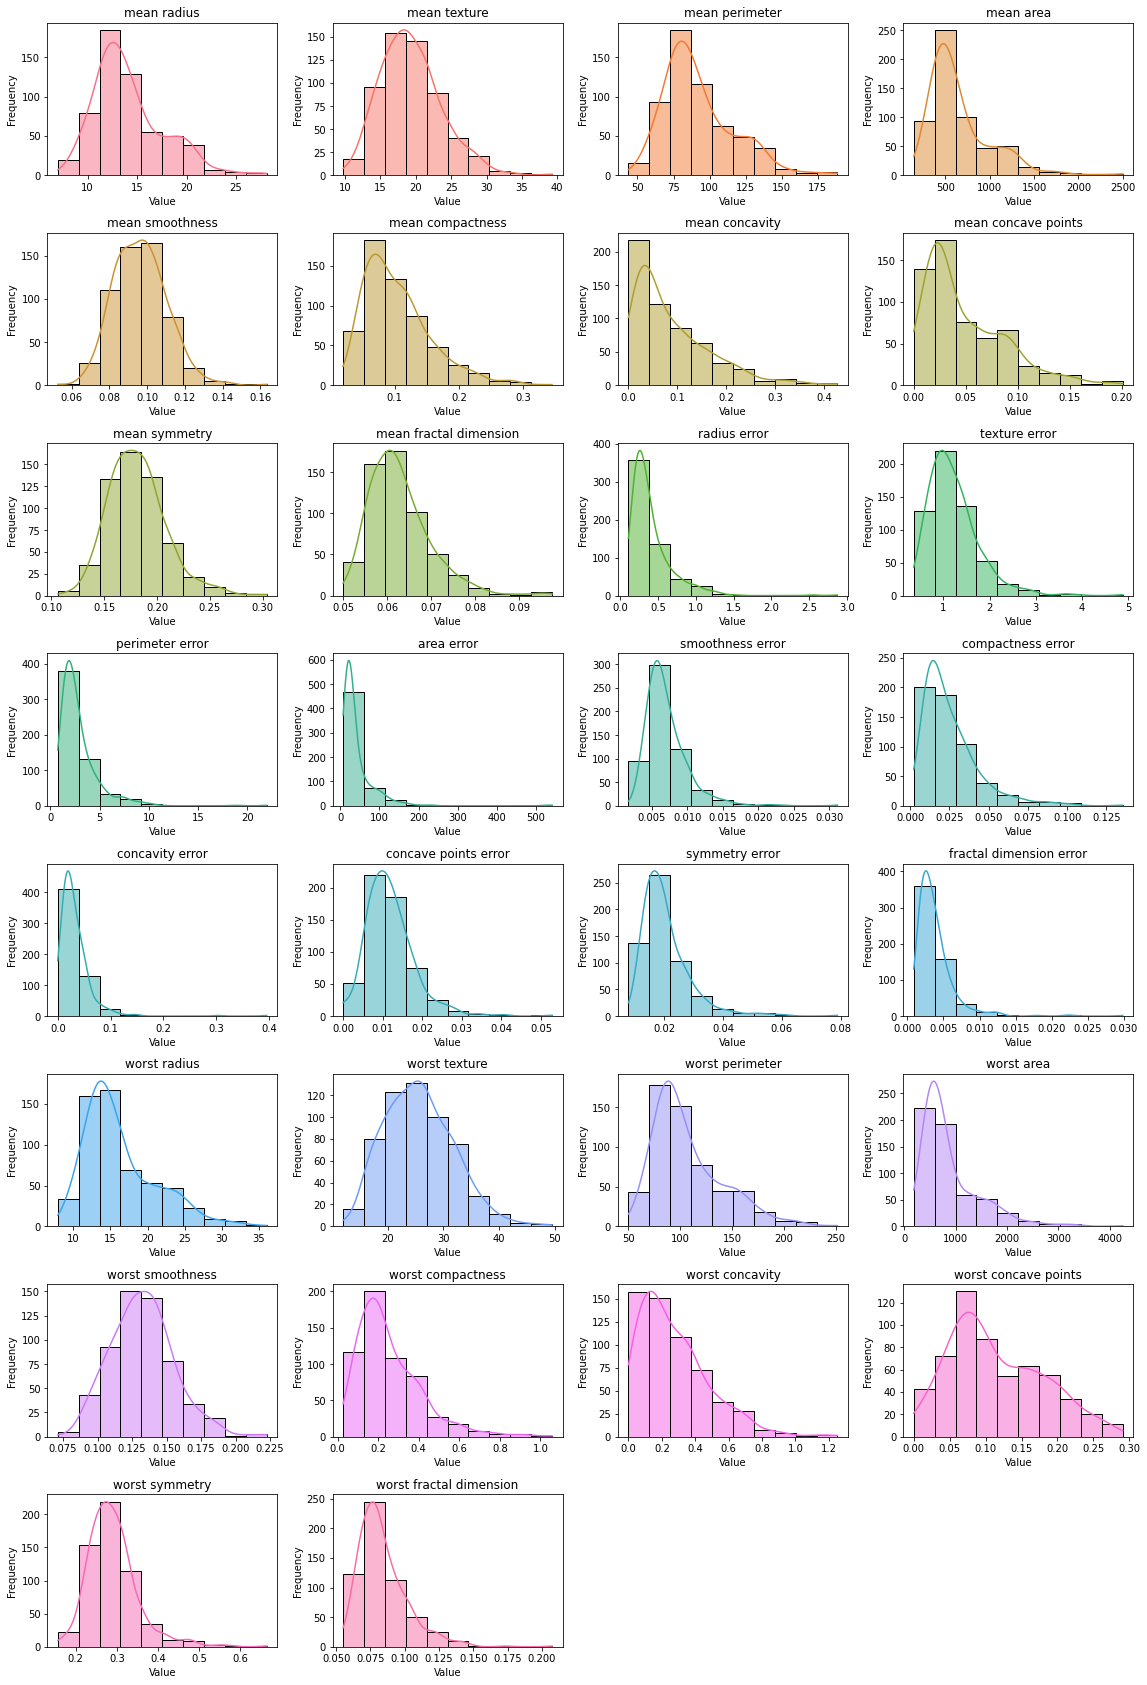

In [5]:
# Making histogram of the all variables and checking the distribution
df = pd.DataFrame(data.data, columns=data.feature_names)

# Set up the matplotlib figure
plt.figure(figsize=(16, 26))

# Define a color palette with different colors for each column
palette = sns.color_palette("husl", len(df.columns))

# Iterate through each column and plot a histogram with a different color
for i, col in enumerate(df.columns):
    plt.subplot(9, 4, i + 1)
    sns.histplot(df[col], bins=10, kde=True, color=palette[i], edgecolor='black')
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

Making pairplot of the all variables and checking the distribution

Now making the correlation matrix to check the correlation between the variables

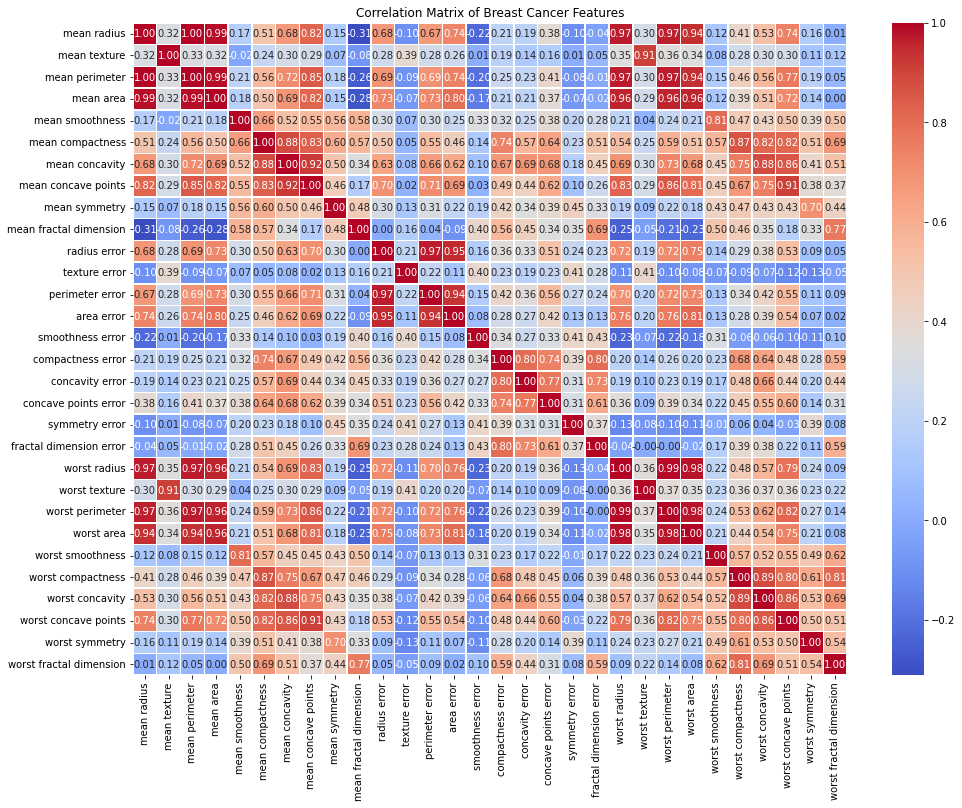

In [6]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Breast Cancer Features')
plt.show()

## Making Model and Hyperparameter Tuning to Find the Best Model

Tuning RandomForest...
Best parameters for RandomForest: {'max_depth': 10, 'n_estimators': 100}
Accuracy for RandomForest: 0.9649122807017544
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Tuning SVM...
Best parameters for SVM: {'C': 1, 'kernel': 'linear'}
Accuracy for SVM: 0.956140350877193
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Tuning KNN...
Best parameters for KNN: {'n_neighbors': 7, 'weights': 'distance'}
Accuracy for KNN: 0

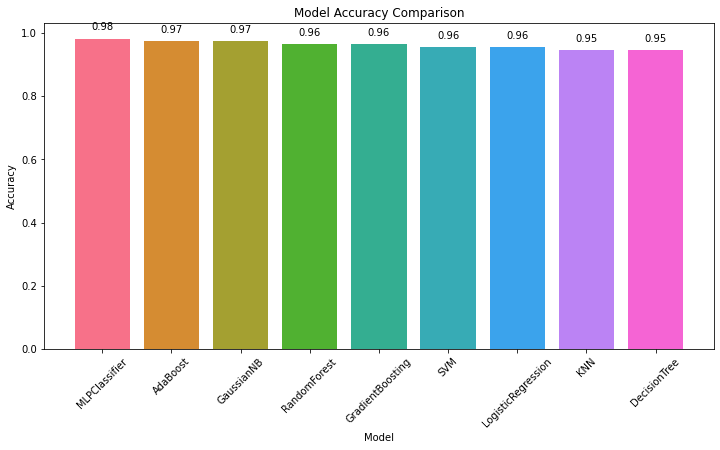

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models and their hyperparameters
models = {
    'RandomForest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(max_iter=10000),
    'DecisionTree': DecisionTreeClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'GaussianNB': GaussianNB(),
    'MLPClassifier': MLPClassifier(max_iter=10000)
}

param_grids = {
    'RandomForest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    'KNN': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    },
    'LogisticRegression': {
        'C': [0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs']
    },
    'DecisionTree': {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 10, 20]
    },
    'GradientBoosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 1],
        'max_depth': [3, 5, 7]
    },
    'AdaBoost': {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1, 1]
    },
    'GaussianNB': {},  # No hyperparameters to tune for GaussianNB
    'MLPClassifier': {
        'hidden_layer_sizes': [(100,), (50, 50)],
        'activation': ['tanh', 'relu'],
        'solver': ['adam', 'lbfgs'],
        'alpha': [0.0001, 0.05]
    }
}

# Function to perform model tuning and evaluation
def tune_and_evaluate(models, param_grids, X_train, y_train, X_test, y_test):
    best_model = None
    best_score = 0
    best_model_name = ""
    model_scores = []
    for model_name, model in models.items():
        print(f"Tuning {model_name}...")
        grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy')
        grid_search.fit(X_train, y_train)
        
        best_estimator = grid_search.best_estimator_
        predictions = best_estimator.predict(X_test)
        score = accuracy_score(y_test, predictions)
        
        print(f"Best parameters for {model_name}: {grid_search.best_params_}")
        print(f"Accuracy for {model_name}: {score}")
        print(classification_report(y_test, predictions))
        
        model_scores.append((model_name, score))
        
        if score > best_score:
            best_score = score
            best_model = best_estimator
            best_model_name = model_name
            
    print(f"\nBest Model: {best_model_name} with Accuracy: {best_score}")
    
    
    # Plotting model accuracies
    model_scores = sorted(model_scores, key=lambda x: x[1], reverse=True)
    models, scores = zip(*model_scores)
    plt.figure(figsize=(12, 6))
    bars = plt.bar(models, scores, color=sns.color_palette("husl", len(models)))
    
    # Add accuracy numbers on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, height + 0.02, f'{height:.2f}', 
                 ha='center', va='bottom', fontsize=10)
    
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy Comparison')
    plt.xticks(rotation=45)
    plt.show()
    
    return best_model_name, best_model, best_score
    
# Run the tuning and evaluation
best_model_name, best_model, best_score = tune_and_evaluate(models, param_grids, X_train, y_train, X_test, y_test)



## Plotting Learning Curve and Loss Curve
Now we have find the best model for the dataset. We will plot Learning Curve plot and Loss Curve plot to see the performance of the model.

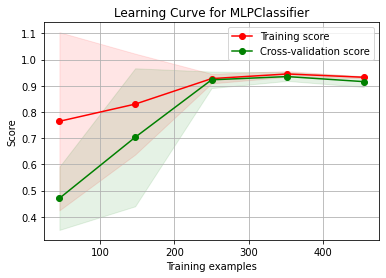

In [8]:
# Function to plot learning curves
def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curves for the best model
plot_learning_curve(best_model, f'Learning Curve for {best_model_name}', X, y, cv=5, n_jobs=-1)
plt.show()


## Conclusion

In this analysis, we compared various classification models for predicting breast cancer diagnoses using the Breast Cancer Wisconsin dataset. The performance of each model was evaluated using accuracy, precision, recall, and F1-score metrics. The following models were tuned and assessed:

### Model Performance Summary

- **RandomForest**
  - **Best Parameters**: `{'max_depth': 10, 'n_estimators': 100}`
  - **Accuracy**: 0.965
  - **Precision**: 0.98 (Class 0), 0.96 (Class 1)
  - **Recall**: 0.93 (Class 0), 0.99 (Class 1)
  - **F1-Score**: 0.95 (Class 0), 0.97 (Class 1)

- **SVM**
  - **Best Parameters**: `{'C': 1, 'kernel': 'linear'}`
  - **Accuracy**: 0.956
  - **Precision**: 0.97 (Class 0), 0.95 (Class 1)
  - **Recall**: 0.91 (Class 0), 0.99 (Class 1)
  - **F1-Score**: 0.94 (Class 0), 0.97 (Class 1)

- **KNN**
  - **Best Parameters**: `{'n_neighbors': 7, 'weights': 'distance'}`
  - **Accuracy**: 0.947
  - **Precision**: 0.97 (Class 0), 0.93 (Class 1)
  - **Recall**: 0.88 (Class 0), 0.99 (Class 1)
  - **F1-Score**: 0.93 (Class 0), 0.96 (Class 1)

- **Logistic Regression**
  - **Best Parameters**: `{'C': 10, 'solver': 'liblinear'}`
  - **Accuracy**: 0.956
  - **Precision**: 0.97 (Class 0), 0.95 (Class 1)
  - **Recall**: 0.91 (Class 0), 0.99 (Class 1)
  - **F1-Score**: 0.94 (Class 0), 0.97 (Class 1)

- **DecisionTree**
  - **Best Parameters**: `{'max_depth': 10, 'min_samples_split': 10}`
  - **Accuracy**: 0.947
  - **Precision**: 0.93 (Class 0), 0.96 (Class 1)
  - **Recall**: 0.93 (Class 0), 0.96 (Class 1)
  - **F1-Score**: 0.93 (Class 0), 0.96 (Class 1)

- **GradientBoosting**
  - **Best Parameters**: `{'learning_rate': 1, 'max_depth': 3, 'n_estimators': 200}`
  - **Accuracy**: 0.965
  - **Precision**: 0.95 (Class 0), 0.97 (Class 1)
  - **Recall**: 0.95 (Class 0), 0.97 (Class 1)
  - **F1-Score**: 0.95 (Class 0), 0.97 (Class 1)

- **AdaBoost**
  - **Best Parameters**: `{'learning_rate': 1, 'n_estimators': 100}`
  - **Accuracy**: 0.974
  - **Precision**: 0.98 (Class 0), 0.97 (Class 1)
  - **Recall**: 0.95 (Class 0), 0.99 (Class 1)
  - **F1-Score**: 0.96 (Class 0), 0.98 (Class 1)

- **GaussianNB**
  - **Best Parameters**: `{}`
  - **Accuracy**: 0.974
  - **Precision**: 1.00 (Class 0), 0.96 (Class 1)
  - **Recall**: 0.93 (Class 0), 1.00 (Class 1)
  - **F1-Score**: 0.96 (Class 0), 0.98 (Class 1)

- **MLPClassifier**
  - **Best Parameters**: `{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'solver': 'adam'}`
  - **Accuracy**: 0.982
  - **Precision**: 1.00 (Class 0), 0.97 (Class 1)
  - **Recall**: 0.95 (Class 0), 1.00 (Class 1)
  - **F1-Score**: 0.98 (Class 0), 0.99 (Class 1)

### Best Model

The best performing model is **MLPClassifier** with an accuracy of **98.25%**. It provides the highest accuracy, precision, recall, and F1-score among all evaluated models. This model demonstrates excellent performance in distinguishing between malignant and benign breast cancer cases.

Future work could involve further hyperparameter tuning, feature selection, and additional model evaluation metrics to enhance the model's performance and robustness.

## Acknowledgments

I would like to express my gratitude to the following:

- **Kaggle**: For providing the Breast Cancer Diagnostic dataset which made this analysis possible.
- **Open Source Libraries**: Such as scikit-learn, matplotlib, and seaborn for their valuable tools and resources.

Thank you for your support and contributions.

## References

- [Breast Cancer Wisconsin (Diagnostic) Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))
- [Scikit-Learn Documentation](https://scikit-learn.org/stable/documentation.html)
- [Matplotlib Documentation](https://matplotlib.org/stable/contents.html)
- [Seaborn Documentation](https://seaborn.pydata.org/tutorial.html)
- [Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/index.html)
- [NumPy Documentation](https://numpy.org/doc/stable/)
- [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)
- [Machine Learning Mastery](https://machinelearningmastery.com/)

## Author

- [Ahmad Bin Sadiq](https://www.linkedin.com/in/ahmadbinsadiq/)


---